Breast Cancer Prediction Notebook

In [2]:
import numpy as np
import pandas as pd
import json

def parse_columns_from_string(input_string):
    columns = input_string.split()
    return columns

data = pd.read_csv("data.csv")
data

C:\Users\osama\AppData\Local\Temp\ipykernel_19188\1865446830.py:9: DtypeWarning: Columns (662,664,676,677,683,685,686,687) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data.csv")


,cancer_type,patient_id,age_at_diagnosis,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,er_status,neoplasm_histologic_grade,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,Breast Invasive Ductal Carcinoma,474,54.29,High,1,LumB,1,Positve,Positive,3.0,...,0,0,0,0,0,0,0,0,0,0
1,Breast Invasive Ductal Carcinoma,7029,43.45,Moderate,0,LumA,4,Positve,Positive,1.0,...,0,0,0,0,0,0,0,0,0,0
2,Breast Invasive Ductal Carcinoma,5215,74.11,High,0,LumB,3,Positve,Positive,3.0,...,0,0,0,0,0,0,0,0,0,0
3,Breast Invasive Ductal Carcinoma,5412,51.87,High,0,LumA,3,Positve,Positive,2.0,...,0,0,0,0,0,0,0,0,0,0
4,Breast Invasive Ductal Carcinoma,465,87.18,Moderate,0,LumB,1,Positve,Positive,3.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1491,Breast Invasive Ductal Carcinoma,5175,50.08,Moderate,0,claudin-low,3,Positve,Positive,NaN,...,0,0,0,0,0,0,0,0,0,0
1492,Breast Invasive Ductal Carcinoma,4189,60.99,High,0,Her2,3,Positve,Positive,NaN,...,0,0,0,0,0,0,0,0,0,0
1493,Breast Invasive Ductal Carcinoma,7122,83.39,Moderate,0,Basal,4,Positve,Positive,3.0,...,0,0,0,0,0,0,0,0,0,0
1494,Breast Invasive Ductal Carcinoma,7174,60.63,High,0,LumB,4,NaN,Positive,3.0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
column_string_one = "brca1	brca2	palb2	pten	tp53	atm	cdh1	chek2	nbn	nf1	stk11	bard1	mlh1	msh2	msh6	pms2	epcam	rad51c	rad51d	rad50	rb1	rbl1	rbl2	ccna1	ccnb1	cdk1	ccne1	cdk2	cdc25a	ccnd1	cdk4	cdk6	ccnd2	cdkn2a	cdkn2b	myc	cdkn1a	cdkn1b	e2f1	e2f2	e2f3	e2f4	e2f5	e2f6	e2f7	e2f8	src	jak1	jak2	stat1	stat2	stat3	stat5a	stat5b	mdm2	tp53bp1	adam10	adam17	aph1a	aph1b	arrdc1	cir1	ctbp1	ctbp2	cul1	dll1	dll3	dll4	dtx1	dtx2	dtx3	dtx4	ep300	fbxw7	hdac1	hdac2	hes1	hes5	heyl	itch	jag1	jag2	kdm5a	lfng	maml1	maml2	maml3	ncor2	ncstn	notch1	notch2	notch3	nrarp	numb	numbl	psen1	psen2	psenen	rbpj	rbpjl	rfng	snw1	spen	hes2	hes4	hes7	hey1	hey2	acvr1	acvr1b	acvr1c	acvr2a	acvr2b	acvrl1	akt1	akt1s1	akt2	apaf1	arl11	atr	aurka	bad	bcl2	bcl2l1	bmp10	bmp15	bmp2	bmp3	bmp4	bmp5	bmp6	bmp7	bmpr1a	bmpr1b	bmpr2	braf	casp10	casp3	casp6	casp7	casp8	casp9	chek1	csf1	csf1r	cxcl8	cxcr1	cxcr2	dab2	diras3	dlec1	dph1	egfr	eif4e	eif4ebp1	eif5a2	erbb2	erbb3	erbb4	fas	fgf1	fgfr1	folr1	folr2	folr3	foxo1	foxo3	gdf11	gdf2	gsk3b	hif1a	hla-g	hras	igf1	igf1r	inha	inhba	inhbc	itgav	itgb3	izumo1r	kdr	kit	kras	map2k1	map2k2	map2k3	map2k4	map2k5	map3k1	map3k3	map3k4	map3k5	mapk1	mapk12	mapk14	mapk3	mapk4	mapk6	mapk7	mapk8	mapk9	mdc1	mlst8	mmp1	mmp10	mmp11	mmp12	mmp13	mmp14	mmp15	mmp16	mmp17	mmp19	mmp2	mmp21	mmp23b	mmp24	mmp25	mmp26	mmp27	mmp28	mmp3	mmp7	mmp9	mtor	nfkb1	nfkb2	opcml	pdgfa	pdgfb	pdgfra	pdgfrb	pdpk1	peg3	pik3ca	pik3r1	pik3r2	plagl1	ptk2	rab25	rad51	raf1	rassf1	rheb	rictor	rps6	rps6ka1	rps6ka2	rps6kb1	rps6kb2	rptor	slc19a1	smad1	smad2	smad3	smad4	smad5	smad6	smad7	smad9	sptbn1	terc	tert	tgfb1	tgfb2	tgfb3	tgfbr1	tgfbr2	tgfbr3	tsc1	tsc2	vegfa	vegfb	wfdc2	wwox	zfyve9	arid1a	arid1b	cbfb	gata3	kmt2c	kmt2d	myh9	ncor1	pde4dip	ptprd	ros1	runx1	tbx3	abcb1	abcb11	abcc1	abcc10	bbc3	bmf	cyp2c8	cyp3a4	fgf2	fn1	map2	map4	mapt	nr1i2	slco1b3	tubb1	tubb4a	tubb4b	twist1	adgra2	afdn	aff2	agmo	agtr2	ahnak	ahnak2	akap9	alk	apc	arid2	arid5b	asxl1	asxl2	bap1	bcas3	birc6	cacna2d3	ccnd3	chd1	clk3	clrn2	col12a1	col22a1	col6a3	ctcf	ctnna1	ctnna3	dnah11	dnah2	dnah5	dtwd2	fam20c	fanca	fancd2	flt3	foxp1	frmd3	gh1	gldc	gpr32	gps2	hdac9	herc2	hist1h2bc	kdm3a	kdm6a	klrg1	l1cam	lama2	lamb3	large1	ldlrap1	lifr	lipi	magea8	map3k10	map3k13	men1	mtap	muc16	myo1a	myo3a	ncoa3	nek1	nf2	npnt	nr2f1	nr3c1	nras	nrg3	nt5e	or6a2	palld	pbrm1	ppp2cb	ppp2r2a	prkacg	prkce	prkcq	prkcz	prkg1	prps2	prr16	ptpn22	ptprm	rasgef1b	rpgr	ryr2	sbno1	setd1a	setd2	setdb1	sf3b1	sgcd	shank2	siah1	sik1	sik2	smarcb1	smarcc1	smarcc2	smarcd1	spaca1	stab2	stmn2	syne1	taf1	taf4b	tbl1xr1	tg	thada	thsd7a	ttyh1	ubr5	ush2a	usp9x	utrn	zfp36l1	ackr3	akr1c1	akr1c2	akr1c3	akr1c4	akt3	ar	bche	cdk8	cdkn2c	cyb5a	cyp11a1	cyp11b2	cyp17a1	cyp19a1	cyp21a2	cyp3a43	cyp3a5	cyp3a7	ddc	hes6	hsd17b1	hsd17b10	hsd17b11	hsd17b12	hsd17b13	hsd17b14	hsd17b2	hsd17b3	hsd17b4	hsd17b6	hsd17b7	hsd17b8	hsd3b1	hsd3b2	hsd3b7	mecom	met	ncoa2	nrip1	pik3r3	prkci	prkd1	ran	rdh5	sdc4	serpini1	shbg	slc29a1	sox9	spry2	srd5a1	srd5a2	srd5a3	st7	star	tnk2	tulp4	ugt2b15	ugt2b17	ugt2b7"
column_string_two = 'pik3ca_mut	tp53_mut	muc16_mut	ahnak2_mut	kmt2c_mut	syne1_mut	gata3_mut	map3k1_mut	ahnak_mut	dnah11_mut	cdh1_mut	dnah2_mut	kmt2d_mut	ush2a_mut	ryr2_mut	dnah5_mut	herc2_mut	pde4dip_mut	akap9_mut	tg_mut	birc6_mut	utrn_mut	tbx3_mut	col6a3_mut	arid1a_mut	lama2_mut	notch1_mut	cbfb_mut	ncor2_mut	col12a1_mut	col22a1_mut	pten_mut	akt1_mut	atr_mut	thada_mut	ncor1_mut	stab2_mut	myh9_mut	runx1_mut	nf1_mut	map2k4_mut	ros1_mut	lamb3_mut	arid1b_mut	erbb2_mut	sf3b1_mut	shank2_mut	ep300_mut	ptprd_mut	usp9x_mut	setd2_mut	setd1a_mut	thsd7a_mut	afdn_mut	erbb3_mut	rb1_mut	myo1a_mut	alk_mut	fanca_mut	adgra2_mut	ubr5_mut	pik3r1_mut	myo3a_mut	asxl2_mut	apc_mut	ctcf_mut	asxl1_mut	fancd2_mut	taf1_mut	kdm6a_mut	ctnna3_mut	brca1_mut	ptprm_mut	foxo3_mut	usp28_mut	gldc_mut	brca2_mut	cacna2d3_mut	arid2_mut	aff2_mut	lifr_mut	sbno1_mut	kdm3a_mut	ncoa3_mut	bap1_mut	l1cam_mut	pbrm1_mut	chd1_mut	jak1_mut	setdb1_mut	fam20c_mut	arid5b_mut	egfr_mut	map3k10_mut	smarcc2_mut	erbb4_mut	npnt_mut	nek1_mut	agmo_mut	zfp36l1_mut	smad4_mut	sik1_mut	casp8_mut	prkcq_mut	smarcc1_mut	palld_mut	dcaf4l2_mut	bcas3_mut	cdkn1b_mut	gps2_mut	men1_mut	stk11_mut	sik2_mut	ptpn22_mut	brip1_mut	flt3_mut	nrg3_mut	fbxw7_mut	ttyh1_mut	taf4b_mut	or6a2_mut	map3k13_mut	hdac9_mut	prkacg_mut	rpgr_mut	large1_mut	foxp1_mut	clk3_mut	prkcz_mut	lipi_mut	ppp2r2a_mut	prkce_mut	gh1_mut	gpr32_mut	kras_mut	nf2_mut	chek2_mut	ldlrap1_mut	clrn2_mut	acvrl1_mut	agtr2_mut	cdkn2a_mut	ctnna1_mut	magea8_mut	prr16_mut	dtwd2_mut	akt2_mut	braf_mut	foxo1_mut	nt5e_mut	ccnd3_mut	nr3c1_mut	prkg1_mut	tbl1xr1_mut	frmd3_mut	smad2_mut	sgcd_mut	spaca1_mut	rasgef1b_mut	hist1h2bc_mut	nr2f1_mut	klrg1_mut	mbl2_mut	mtap_mut	ppp2cb_mut	smarcd1_mut	nras_mut	ndfip1_mut	hras_mut	prps2_mut	smarcb1_mut	stmn2_mut	siah1_mut'
text_columns_one = parse_columns_from_string(column_string_one)
text_columns_two = parse_columns_from_string(column_string_two)

selected_features_x = text_columns_one
selected_features_y = text_columns_two

In [11]:
text_columns_two

['pik3ca_mut',
 'tp53_mut',
 'muc16_mut',
 'ahnak2_mut',
 'kmt2c_mut',
 'syne1_mut',
 'gata3_mut',
 'map3k1_mut',
 'ahnak_mut',
 'dnah11_mut',
 'cdh1_mut',
 'dnah2_mut',
 'kmt2d_mut',
 'ush2a_mut',
 'ryr2_mut',
 'dnah5_mut',
 'herc2_mut',
 'pde4dip_mut',
 'akap9_mut',
 'tg_mut',
 'birc6_mut',
 'utrn_mut',
 'tbx3_mut',
 'col6a3_mut',
 'arid1a_mut',
 'lama2_mut',
 'notch1_mut',
 'cbfb_mut',
 'ncor2_mut',
 'col12a1_mut',
 'col22a1_mut',
 'pten_mut',
 'akt1_mut',
 'atr_mut',
 'thada_mut',
 'ncor1_mut',
 'stab2_mut',
 'myh9_mut',
 'runx1_mut',
 'nf1_mut',
 'map2k4_mut',
 'ros1_mut',
 'lamb3_mut',
 'arid1b_mut',
 'erbb2_mut',
 'sf3b1_mut',
 'shank2_mut',
 'ep300_mut',
 'ptprd_mut',
 'usp9x_mut',
 'setd2_mut',
 'setd1a_mut',
 'thsd7a_mut',
 'afdn_mut',
 'erbb3_mut',
 'rb1_mut',
 'myo1a_mut',
 'alk_mut',
 'fanca_mut',
 'adgra2_mut',
 'ubr5_mut',
 'pik3r1_mut',
 'myo3a_mut',
 'asxl2_mut',
 'apc_mut',
 'ctcf_mut',
 'asxl1_mut',
 'fancd2_mut',
 'taf1_mut',
 'kdm6a_mut',
 'ctnna3_mut',
 'brca1_mut

In [14]:
# Confirm the presence of the columns in the DataFrame
print("Columns in df:", df.columns.tolist())
print("Selected features x:", selected_features_x)
print("Selected features y:", selected_features_y)

# Check for mismatch in column names
print("Missing in df from selected_features_x:", set(selected_features_x) - set(df.columns))
print("Missing in df from selected_features_y:", set(selected_features_y) - set(df.columns))

# Compute the correlation matrix
combined_features = list(set(selected_features_x + selected_features_y))  # Ensure unique columns
correlation_data = df[combined_features]
corr_matrix = correlation_data.corr()

# Confirm the shape of the correlation matrix is as expected
print("Shape of the correlation matrix:", corr_matrix.shape)

# Access the subset of the correlation matrix and confirm its shape
corr_matrix_subset = corr_matrix.loc[selected_features_y, selected_features_x]
print("Shape of the subset correlation matrix:", corr_matrix_subset.shape)

# If everything is as expected, proceed with the visualization:
# (visualization code here)


Columns in df: ['cancer_type', 'patient_id', 'age_at_diagnosis', 'cellularity', 'chemotherapy', 'pam50_+_claudin-low_subtype', 'cohort', 'er_status_measured_by_ihc', 'er_status', 'neoplasm_histologic_grade', 'her2_status_measured_by_snp6', 'her2_status', 'hormone_therapy', 'inferred_menopausal_state', 'primary_tumor_laterality', 'lymph_nodes_examined_positive', 'mutation_count', 'nottingham_prognostic_index', 'overall_survival_months', 'overall_survival', 'pr_status', 'radio_therapy', '3-gene_classifier_subtype', 'tumor_size', 'tumor_stage', 'death_from_cancer', 'brca1', 'brca2', 'palb2', 'pten', 'tp53', 'atm', 'cdh1', 'chek2', 'nbn', 'nf1', 'stk11', 'bard1', 'mlh1', 'msh2', 'msh6', 'pms2', 'epcam', 'rad51c', 'rad51d', 'rad50', 'rb1', 'rbl1', 'rbl2', 'ccna1', 'ccnb1', 'cdk1', 'ccne1', 'cdk2', 'cdc25a', 'ccnd1', 'cdk4', 'cdk6', 'ccnd2', 'cdkn2a', 'cdkn2b', 'myc', 'cdkn1a', 'cdkn1b', 'e2f1', 'e2f2', 'e2f3', 'e2f4', 'e2f5', 'e2f6', 'e2f7', 'e2f8', 'src', 'jak1', 'jak2', 'stat1', 'stat2', 

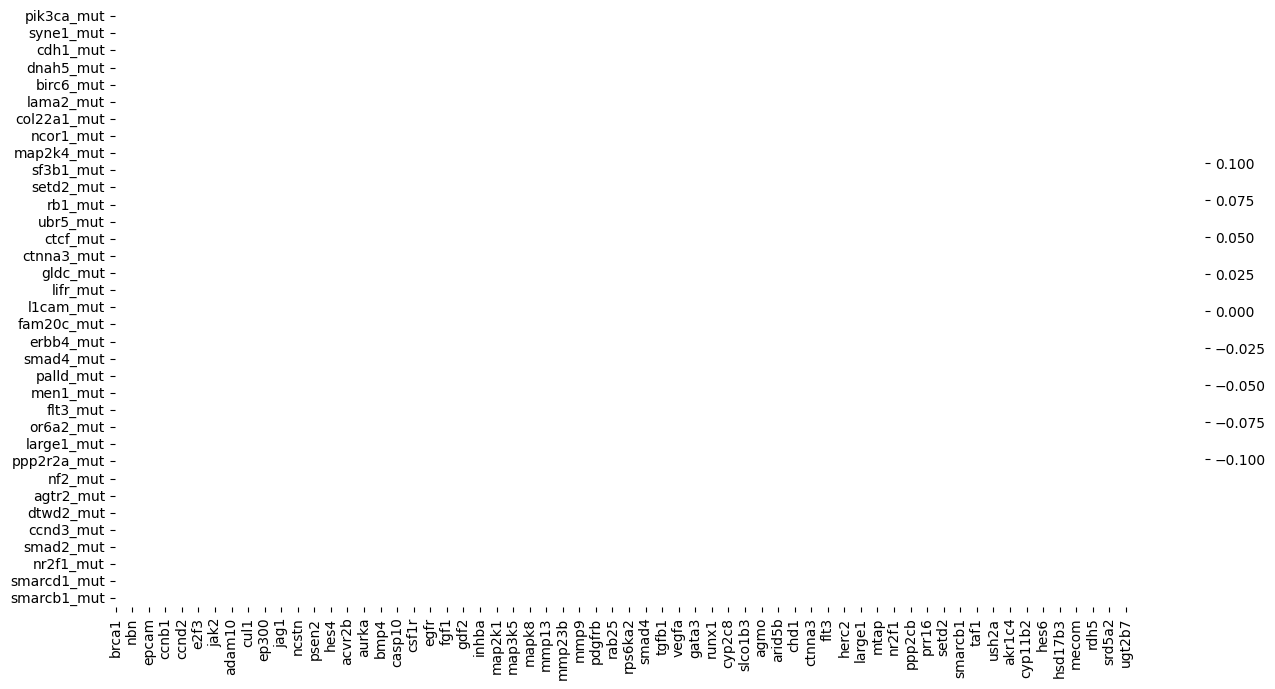

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = data

# Verify that the DataFrame is not empty and the features exist in the DataFrame
assert not df.empty, "The DataFrame is empty."
assert set(selected_features_x).issubset(df.columns), "Some features in selected_features_x are not in the DataFrame."
assert set(selected_features_y).issubset(df.columns), "Some features in selected_features_y are not in the DataFrame."

selected_feature_y

# Ensure all selected features are numeric
df[selected_features_x] = df[selected_features_x].apply(pd.to_numeric, errors='coerce')
df[selected_features_y] = df[selected_features_y].apply(pd.to_numeric, errors='coerce')

# Handle NA/NaN values by dropping or imputing
df = df.dropna(subset=selected_features_x + selected_features_y)

# # Check for constant columns and remove them if any
# for feature in combined_features:
#     if df[feature].nunique() == 1:
#         combined_features.remove(feature)
#         print(f"Removed constant column: {feature}")

# Now compute the correlation matrix with the updated features
correlation_data = df[combined_features]
corr_matrix = correlation_data.corr()

# Proceed to extract the subset and create the heatmap as earlier

corr_matrix_subset = corr_matrix.loc[selected_features_y, selected_features_x]

# Assuming 'corr_matrix_subset' is the correlation matrix you want to plot.

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 7))  # Adjust the figure size as necessary

# Find the min and max values in the correlation matrix
min_corr = corr_matrix_subset.min().min()
max_corr = corr_matrix_subset.max().max()

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix_subset, cmap=cmap, vmin=min_corr, vmax=max_corr, annot=True,
            fmt=".2f", linewidths=.5, cbar_kws={"shrink": .5})

# Improve the visibility of the labels (optional)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Tight layout to fit everything within the figure cleanly
plt.tight_layout()

# Display the heatmap
plt.show()


C:\Users\osama\AppData\Local\Temp\ipykernel_19188\354613222.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[selected_features_y] = df[selected_features_y].apply(pd.to_numeric, errors='coerce')
C:\Users\osama\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)


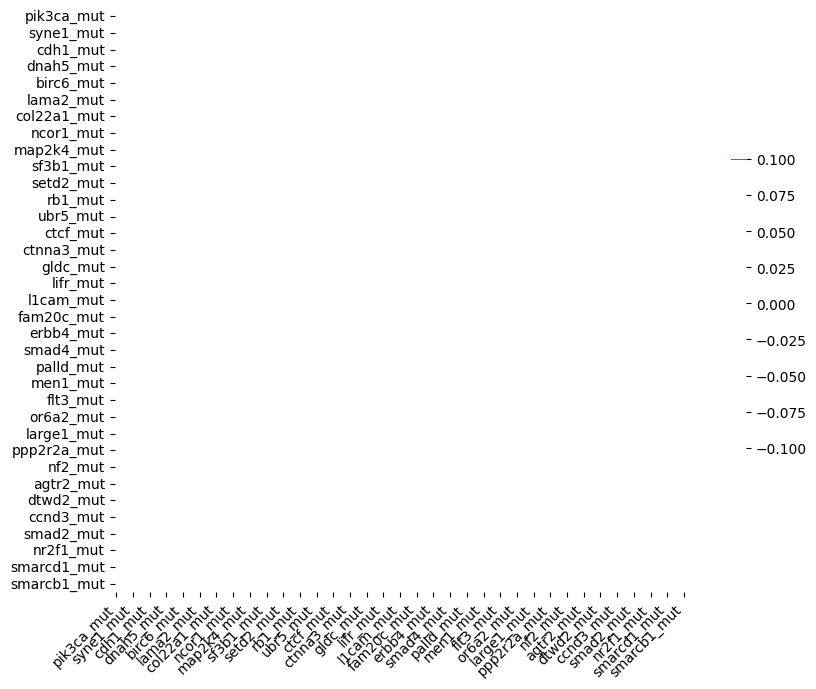

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
# df = pd.read_csv('your_dataset.csv')

# Specify your selected features
# selected_features = ['feature1', 'feature2', 'feature3', 'feature4']  # replace with your actual column names

# Ensure all selected features are numeric
# df[selected_features_x] = df[selected_features_x].apply(pd.to_numeric, errors='coerce')
# Ensure all selected features are numeric
df[selected_features_y] = df[selected_features_y].apply(pd.to_numeric, errors='coerce')

# Handle NA/NaN values by dropping rows where NA/NaN values are present in the selected features
df = df.dropna(subset=selected_features_y)

# Compute the correlation matrix for the selected features
corr_matrix = df[selected_features_y].corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(9, 7))  # Adjust the figure size as necessary

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr_matrix, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Improve the visibility of the labels (optional)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Tight layout to fit everything within the figure cleanly
plt.tight_layout()

# Display the heatmap
plt.show()

In [2]:
# age_cancer = data.loc[data["cancer_type"] == "Breast Mixed Ductal and Lobular Carcinoma","age_at_diagnosis"]
# age_cancer_check = (age_cancer >= 60).sum() / len(age_cancer)
# age_cancer_check

In [3]:
# ims_cancer = data.loc[data["cancer_type"] == "Breast Mixed Ductal and Lobular Carcinoma", "inferred_menopausal_state"]
# ims_cancer_check = (ims_cancer == "Post").sum() / len(ims_cancer)
# ims_cancer_check

In [4]:
# ht = data.loc[data["cancer_type"] == "Breast Mixed Ductal and Lobular Carcinoma","hormone_therapy"]
# ht_check = (ht == 1).sum() / len(ht)
# ht_check

In [5]:
# ptl_cancer = data.loc[data["cancer_type"] == "Breast Mixed Ductal and Lobular Carcinoma", "primary_tumor_laterality"]
# ptl_cancer_check = (ptl_cancer == "Left").sum() / len(ptl_cancer)
# ptl_cancer_check

In [6]:
column_string = 'cellularity	chemotherapy	pam50_+_claudin-low_subtype	cohort	er_status_measured_by_ihc	er_status	neoplasm_histologic_grade	her2_status_measured_by_snp6	her2_status	hormone_therapy	inferred_menopausal_state	primary_tumor_laterality	lymph_nodes_examined_positive	mutation_count	nottingham_prognostic_index	overall_survival_months	overall_survival	pr_status	radio_therapy	3-gene_classifier_subtype	tumor_size	tumor_stage	death_from_cancer'
text_columns = parse_columns_from_string(column_string)
cancer_types = data['cancer_type'].unique()
probabilities = {}

for cancer in cancer_types:
    cancer_data = data[data['cancer_type'] == cancer]
    probabilities[cancer] = {}
    
    for column in text_columns:
        value_counts = cancer_data[column].value_counts(normalize=True)
        probabilities[cancer][column] = value_counts.to_dict()
        
print(json.dumps(probabilities, indent=4))

{
    "Breast Invasive Ductal Carcinoma": {
        "cellularity": {
            "High": 0.523524379811805,
            "Moderate": 0.3772455089820359,
            "Low": 0.09923011120615911
        },
        "chemotherapy": {
            "0": 0.7656380316930775,
            "1": 0.23436196830692244
        },
        "pam50_+_claudin-low_subtype": {
            "LumA": 0.3302752293577982,
            "LumB": 0.24603836530442036,
            "Her2": 0.1267723102585488,
            "Basal": 0.12343619683069225,
            "claudin-low": 0.11259382819015847,
            "Normal": 0.05921601334445371,
            "NC": 0.0016680567139282735
        },
        "cohort": {
            "3": 0.3786488740617181,
            "1": 0.2468723936613845,
            "2": 0.1517931609674729,
            "4": 0.13761467889908258,
            "5": 0.08507089241034195
        },
        "er_status_measured_by_ihc": {
            "Positve": 0.7358171041490262,
            "Negative": 0.2641828958509737

In [7]:
column_string = "brca1	brca2	palb2	pten	tp53	atm	cdh1	chek2	nbn	nf1	stk11	bard1	mlh1	msh2	msh6	pms2	epcam	rad51c	rad51d	rad50	rb1	rbl1	rbl2	ccna1	ccnb1	cdk1	ccne1	cdk2	cdc25a	ccnd1	cdk4	cdk6	ccnd2	cdkn2a	cdkn2b	myc	cdkn1a	cdkn1b	e2f1	e2f2	e2f3	e2f4	e2f5	e2f6	e2f7	e2f8	src	jak1	jak2	stat1	stat2	stat3	stat5a	stat5b	mdm2	tp53bp1	adam10	adam17	aph1a	aph1b	arrdc1	cir1	ctbp1	ctbp2	cul1	dll1	dll3	dll4	dtx1	dtx2	dtx3	dtx4	ep300	fbxw7	hdac1	hdac2	hes1	hes5	heyl	itch	jag1	jag2	kdm5a	lfng	maml1	maml2	maml3	ncor2	ncstn	notch1	notch2	notch3	nrarp	numb	numbl	psen1	psen2	psenen	rbpj	rbpjl	rfng	snw1	spen	hes2	hes4	hes7	hey1	hey2	acvr1	acvr1b	acvr1c	acvr2a	acvr2b	acvrl1	akt1	akt1s1	akt2	apaf1	arl11	atr	aurka	bad	bcl2	bcl2l1	bmp10	bmp15	bmp2	bmp3	bmp4	bmp5	bmp6	bmp7	bmpr1a	bmpr1b	bmpr2	braf	casp10	casp3	casp6	casp7	casp8	casp9	chek1	csf1	csf1r	cxcl8	cxcr1	cxcr2	dab2	diras3	dlec1	dph1	egfr	eif4e	eif4ebp1	eif5a2	erbb2	erbb3	erbb4	fas	fgf1	fgfr1	folr1	folr2	folr3	foxo1	foxo3	gdf11	gdf2	gsk3b	hif1a	hla-g	hras	igf1	igf1r	inha	inhba	inhbc	itgav	itgb3	izumo1r	kdr	kit	kras	map2k1	map2k2	map2k3	map2k4	map2k5	map3k1	map3k3	map3k4	map3k5	mapk1	mapk12	mapk14	mapk3	mapk4	mapk6	mapk7	mapk8	mapk9	mdc1	mlst8	mmp1	mmp10	mmp11	mmp12	mmp13	mmp14	mmp15	mmp16	mmp17	mmp19	mmp2	mmp21	mmp23b	mmp24	mmp25	mmp26	mmp27	mmp28	mmp3	mmp7	mmp9	mtor	nfkb1	nfkb2	opcml	pdgfa	pdgfb	pdgfra	pdgfrb	pdpk1	peg3	pik3ca	pik3r1	pik3r2	plagl1	ptk2	rab25	rad51	raf1	rassf1	rheb	rictor	rps6	rps6ka1	rps6ka2	rps6kb1	rps6kb2	rptor	slc19a1	smad1	smad2	smad3	smad4	smad5	smad6	smad7	smad9	sptbn1	terc	tert	tgfb1	tgfb2	tgfb3	tgfbr1	tgfbr2	tgfbr3	tsc1	tsc2	vegfa	vegfb	wfdc2	wwox	zfyve9	arid1a	arid1b	cbfb	gata3	kmt2c	kmt2d	myh9	ncor1	pde4dip	ptprd	ros1	runx1	tbx3	abcb1	abcb11	abcc1	abcc10	bbc3	bmf	cyp2c8	cyp3a4	fgf2	fn1	map2	map4	mapt	nr1i2	slco1b3	tubb1	tubb4a	tubb4b	twist1	adgra2	afdn	aff2	agmo	agtr2	ahnak	ahnak2	akap9	alk	apc	arid2	arid5b	asxl1	asxl2	bap1	bcas3	birc6	cacna2d3	ccnd3	chd1	clk3	clrn2	col12a1	col22a1	col6a3	ctcf	ctnna1	ctnna3	dnah11	dnah2	dnah5	dtwd2	fam20c	fanca	fancd2	flt3	foxp1	frmd3	gh1	gldc	gpr32	gps2	hdac9	herc2	hist1h2bc	kdm3a	kdm6a	klrg1	l1cam	lama2	lamb3	large1	ldlrap1	lifr	lipi	magea8	map3k10	map3k13	men1	mtap	muc16	myo1a	myo3a	ncoa3	nek1	nf2	npnt	nr2f1	nr3c1	nras	nrg3	nt5e	or6a2	palld	pbrm1	ppp2cb	ppp2r2a	prkacg	prkce	prkcq	prkcz	prkg1	prps2	prr16	ptpn22	ptprm	rasgef1b	rpgr	ryr2	sbno1	setd1a	setd2	setdb1	sf3b1	sgcd	shank2	siah1	sik1	sik2	smarcb1	smarcc1	smarcc2	smarcd1	spaca1	stab2	stmn2	syne1	taf1	taf4b	tbl1xr1	tg	thada	thsd7a	ttyh1	ubr5	ush2a	usp9x	utrn	zfp36l1	ackr3	akr1c1	akr1c2	akr1c3	akr1c4	akt3	ar	bche	cdk8	cdkn2c	cyb5a	cyp11a1	cyp11b2	cyp17a1	cyp19a1	cyp21a2	cyp3a43	cyp3a5	cyp3a7	ddc	hes6	hsd17b1	hsd17b10	hsd17b11	hsd17b12	hsd17b13	hsd17b14	hsd17b2	hsd17b3	hsd17b4	hsd17b6	hsd17b7	hsd17b8	hsd3b1	hsd3b2	hsd3b7	mecom	met	ncoa2	nrip1	pik3r3	prkci	prkd1	ran	rdh5	sdc4	serpini1	shbg	slc29a1	sox9	spry2	srd5a1	srd5a2	srd5a3	st7	star	tnk2	tulp4	ugt2b15	ugt2b17	ugt2b7"
numerical_columns = parse_columns_from_string(column_string)
cancer_types = data['cancer_type'].unique()
cancer_type_probabilities = {}

for cancer_type in cancer_types:
    cancer_type_data = data[data['cancer_type'] == cancer_type]
    positive_counts = (cancer_type_data[numerical_columns] > 0).sum()
    total_counts = len(cancer_type_data)
    probabilities = positive_counts / total_counts
    cancer_type_probabilities[cancer_type] = probabilities

for cancer_type, probabilities in cancer_type_probabilities.items():
    print(f"Cancer Type: {cancer_type}")
    print(probabilities)
    print("\n")

Cancer Type: Breast Invasive Ductal Carcinoma
brca1      0.448707
brca2      0.493745
palb2      0.492911
pten       0.515430
tp53       0.473728
             ...   
tnk2       0.496247
tulp4      0.482068
ugt2b15    0.249374
ugt2b17    0.405338
ugt2b7     0.334445
Length: 489, dtype: float64


Cancer Type: Breast Invasive Lobular Carcinoma
brca1      0.333333
brca2      0.403509
palb2      0.464912
pten       0.666667
tp53       0.456140
             ...   
tnk2       0.482456
tulp4      0.385965
ugt2b15    0.342105
ugt2b17    0.385965
ugt2b7     0.377193
Length: 489, dtype: float64


Cancer Type: Breast Mixed Ductal and Lobular Carcinoma
brca1      0.381818
brca2      0.412121
palb2      0.472727
pten       0.715152
tp53       0.587879
             ...   
tnk2       0.587879
tulp4      0.521212
ugt2b15    0.387879
ugt2b17    0.430303
ugt2b7     0.345455
Length: 489, dtype: float64


Cancer Type: Breast Invasive Mixed Mucinous Carcinoma
brca1      0.444444
brca2      0.388889
palb2   

In [8]:
column_string = 'pik3ca_mut	tp53_mut	muc16_mut	ahnak2_mut	kmt2c_mut	syne1_mut	gata3_mut	map3k1_mut	ahnak_mut	dnah11_mut	cdh1_mut	dnah2_mut	kmt2d_mut	ush2a_mut	ryr2_mut	dnah5_mut	herc2_mut	pde4dip_mut	akap9_mut	tg_mut	birc6_mut	utrn_mut	tbx3_mut	col6a3_mut	arid1a_mut	lama2_mut	notch1_mut	cbfb_mut	ncor2_mut	col12a1_mut	col22a1_mut	pten_mut	akt1_mut	atr_mut	thada_mut	ncor1_mut	stab2_mut	myh9_mut	runx1_mut	nf1_mut	map2k4_mut	ros1_mut	lamb3_mut	arid1b_mut	erbb2_mut	sf3b1_mut	shank2_mut	ep300_mut	ptprd_mut	usp9x_mut	setd2_mut	setd1a_mut	thsd7a_mut	afdn_mut	erbb3_mut	rb1_mut	myo1a_mut	alk_mut	fanca_mut	adgra2_mut	ubr5_mut	pik3r1_mut	myo3a_mut	asxl2_mut	apc_mut	ctcf_mut	asxl1_mut	fancd2_mut	taf1_mut	kdm6a_mut	ctnna3_mut	brca1_mut	ptprm_mut	foxo3_mut	usp28_mut	gldc_mut	brca2_mut	cacna2d3_mut	arid2_mut	aff2_mut	lifr_mut	sbno1_mut	kdm3a_mut	ncoa3_mut	bap1_mut	l1cam_mut	pbrm1_mut	chd1_mut	jak1_mut	setdb1_mut	fam20c_mut	arid5b_mut	egfr_mut	map3k10_mut	smarcc2_mut	erbb4_mut	npnt_mut	nek1_mut	agmo_mut	zfp36l1_mut	smad4_mut	sik1_mut	casp8_mut	prkcq_mut	smarcc1_mut	palld_mut	dcaf4l2_mut	bcas3_mut	cdkn1b_mut	gps2_mut	men1_mut	stk11_mut	sik2_mut	ptpn22_mut	brip1_mut	flt3_mut	nrg3_mut	fbxw7_mut	ttyh1_mut	taf4b_mut	or6a2_mut	map3k13_mut	hdac9_mut	prkacg_mut	rpgr_mut	large1_mut	foxp1_mut	clk3_mut	prkcz_mut	lipi_mut	ppp2r2a_mut	prkce_mut	gh1_mut	gpr32_mut	kras_mut	nf2_mut	chek2_mut	ldlrap1_mut	clrn2_mut	acvrl1_mut	agtr2_mut	cdkn2a_mut	ctnna1_mut	magea8_mut	prr16_mut	dtwd2_mut	akt2_mut	braf_mut	foxo1_mut	nt5e_mut	ccnd3_mut	nr3c1_mut	prkg1_mut	tbl1xr1_mut	frmd3_mut	smad2_mut	sgcd_mut	spaca1_mut	rasgef1b_mut	hist1h2bc_mut	nr2f1_mut	klrg1_mut	mbl2_mut	mtap_mut	ppp2cb_mut	smarcd1_mut	nras_mut	ndfip1_mut	hras_mut	prps2_mut	smarcb1_mut	stmn2_mut	siah1_mut'
text_columns = parse_columns_from_string(column_string)
cancer_types = data['cancer_type'].unique()
probabilities = {}

for cancer in cancer_types:
    cancer_data = data[data['cancer_type'] == cancer]
    probabilities[cancer] = {}
    
    for column in text_columns:
        value_counts = cancer_data[column].value_counts(normalize=True)
        probabilities[cancer][column] = value_counts.to_dict()
        
print(json.dumps(probabilities, indent=4))

{
    "Breast Invasive Ductal Carcinoma": {
        "pik3ca_mut": {
            "0": 0.5921601334445371,
            "H1047R": 0.1451209341117598,
            "E545K": 0.06922435362802336,
            "E542K": 0.03919933277731443,
            "N345K": 0.02418682235195997,
            "H1047L": 0.014178482068390326,
            "C420R": 0.005838198498748957,
            "Q546R": 0.005838198498748957,
            "H1047R R108H": 0.004170141784820684,
            "Q546K": 0.004170141784820684,
            "G118D": 0.003336113427856547,
            "E545G": 0.003336113427856547,
            "E545K E726K": 0.0025020850708924102,
            "H1047R H1048R": 0.0025020850708924102,
            "E545A": 0.0025020850708924102,
            "G1049R": 0.0025020850708924102,
            "H1047R E453K": 0.0025020850708924102,
            "H1047R E81K": 0.0016680567139282735,
            "H1047R P104L": 0.0016680567139282735,
            "H1047R E365K": 0.0016680567139282735,
            "E542K E726K

In [26]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

# Assuming `df` is your DataFrame and 'cancer_type' is your target column
X = df.drop('cancer_type', axis=1)
y = df['cancer_type'].copy()

# Initialize LabelEncoder
le = LabelEncoder()

# Loop through columns and convert strings to categories
for col in X.columns:
    if X[col].dtype == 'object':  # If the column is a string
        X[col] = le.fit_transform(X[col].astype(str))  # Convert to category codes

# For the target variable, if it's a classification problem and the target is also categorical:
y = le.fit_transform(y.astype(str))

# Now you can continue with imputation (if you have NaN values) and the rest of your ML pipeline


# Split the data
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, train_size=0.6, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_remaining, y_remaining, train_size=0.5, random_state=42)

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Decision Tree
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

# Naive Bayes
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

# Support Vector Machine
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

# Random Forest
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

# AdaBoost
ada_clf = AdaBoostClassifier()
ada_clf.fit(X_train, y_train)

# Gradient Boosting Trees
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)

# Neural Network
nn_model = models.Sequential([
    layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(1, activation='sigmoid')
])
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))

# For clustering and mixture models, we don't predict on y, since they are unsupervised
# Hierarchical Clustering
hc = AgglomerativeClustering()
clusters = hc.fit_predict(X_test)

# Gaussian Mixture Model
gmm = GaussianMixture(n_components=2)
gmm_clusters = gmm.fit_predict(X_test)

# Convolutional Neural Network and Recurrent Neural Network
# These models require specific data shapes and often more complex preprocessing
# and are typically not interchangeable with the above models.


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# Making a prediction with one of the models, for example, Logistic Regression
y_pred = log_reg.predict(X_test)
print(f"Accuracy of Logistic Regression: {accuracy_score(y_test, y_pred)}")

# Decision Tree
y_pred_tree = tree_clf.predict(X_test)
print(f"Accuracy of Decision Tree: {accuracy_score(y_test, y_pred_tree)}")

# Naive Bayes
y_pred_nb = nb_clf.predict(X_test)
print(f"Accuracy of Naive Bayes: {accuracy_score(y_test, y_pred_nb)}")

# Support Vector Machine
y_pred_svm = svm_clf.predict(X_test)
print(f"Accuracy of Support Vector Machine: {accuracy_score(y_test, y_pred_svm)}")

# Random Forest
y_pred_rf = rf_clf.predict(X_test)
print(f"Accuracy of Random Forest: {accuracy_score(y_test, y_pred_rf)}")

# AdaBoost
y_pred_ada = ada_clf.predict(X_test)
print(f"Accuracy of AdaBoost: {accuracy_score(y_test, y_pred_ada)}")

# Gradient Boosting Trees
y_pred_gb = gb_clf.predict(X_test)
print(f"Accuracy of Gradient Boosting Trees: {accuracy_score(y_test, y_pred_gb)}")

# Simple Neural Network - Predict on the test set and round to get binary classification
y_pred_nn = nn_model.predict(X_test).round().flatten()
print(f"Accuracy of Simple Neural Network: {accuracy_score(y_test, y_pred_nn)}")
